In [3]:
from IPython.display import display, HTML
import warnings
warnings.filterwarnings(action='ignore')

# 데이터 전처리
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 기계학습 모델 및 평가
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import accuracy_score, recall_score, precision_score, balanced_accuracy_score
from sklearn.metrics import plot_confusion_matrix
from tqdm import tqdm
from scipy.stats import spearmanr

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib
from matplotlib.colors import ListedColormap
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

<AxesSubplot:xlabel='IL-6', ylabel='IL-8'>

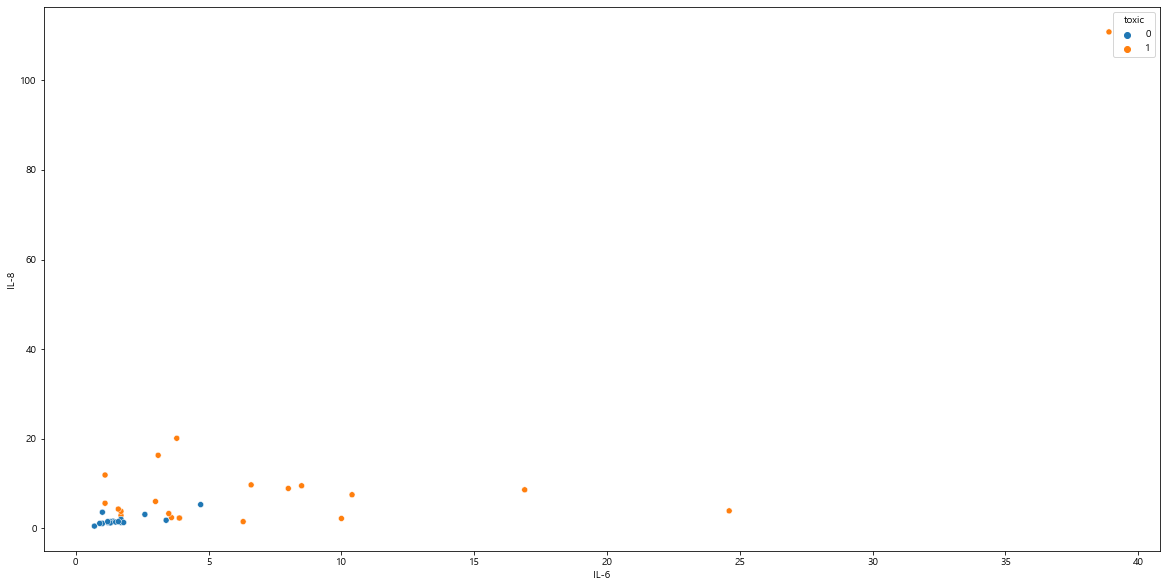

In [4]:
hptc1 = pd.read_csv('HPTC1.csv')
plt.figure(figsize=(20,10))
sns.scatterplot(data=hptc1, x = 'IL-6',y='IL-8',hue='toxic')

<AxesSubplot:xlabel='IL-6', ylabel='IL-8'>

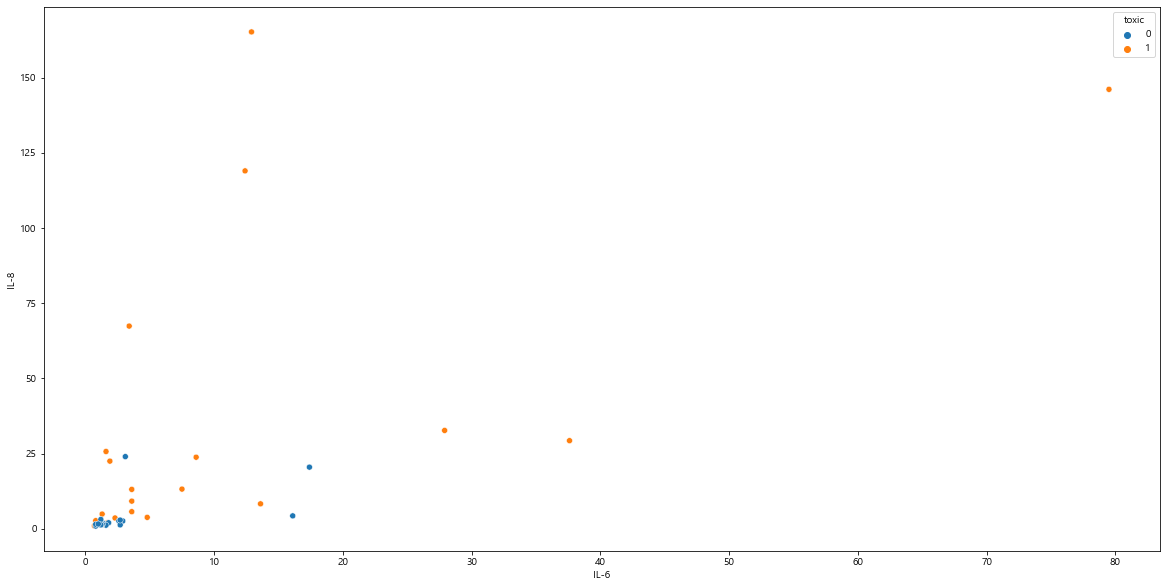

In [5]:
hptc2 = pd.read_csv('HPTC2.csv')
plt.figure(figsize=(20,10))
sns.scatterplot(data=hptc2, x = 'IL-6',y='IL-8',hue='toxic')

<AxesSubplot:xlabel='IL-6', ylabel='IL-8'>

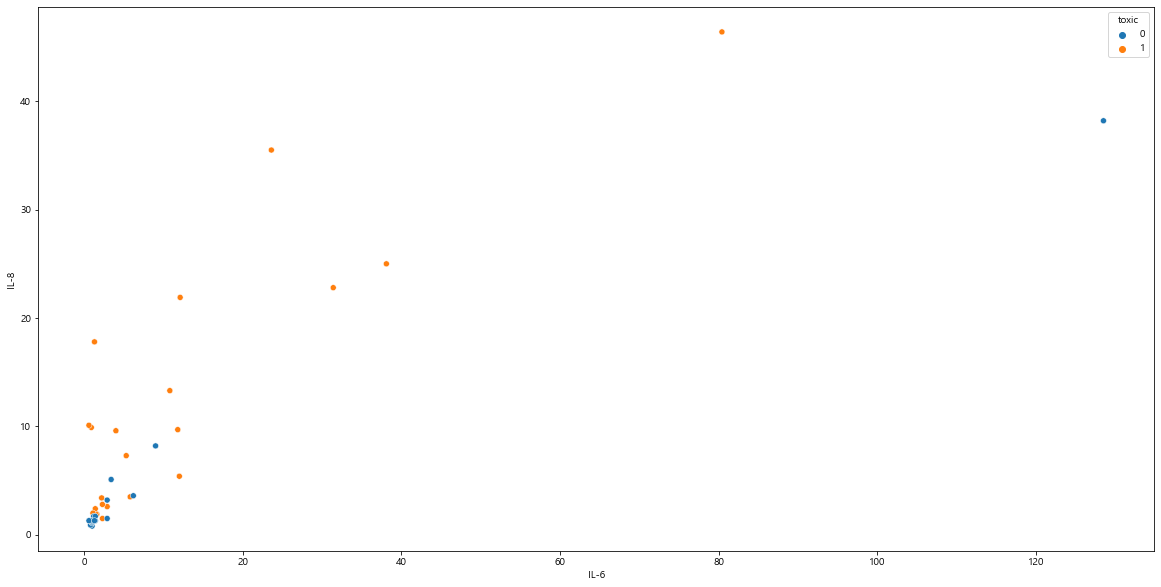

In [6]:
hptc3 = pd.read_csv('HPTC3.csv')
plt.figure(figsize=(20,10))
sns.scatterplot(data=hptc3, x = 'IL-6',y='IL-8',hue='toxic')

In [7]:
X1 = pd.DataFrame(hptc1, columns=['IL-6','IL-8']).to_numpy()
y1 = pd.DataFrame(hptc1, columns=['toxic']).to_numpy()

In [8]:
X1

array([[ 16.9,   8.6],
       [  8. ,   8.9],
       [ 38.9, 110.8],
       [  6.3,   1.5],
       [  8.5,   9.5],
       [  3.9,   2.3],
       [  3.6,   2.4],
       [  3.8,  20.1],
       [  1.7,   1.5],
       [  3.1,  16.3],
       [  3. ,   6. ],
       [  1.1,  11.9],
       [  6.6,   9.7],
       [ 10.4,   7.5],
       [  1.7,   2.9],
       [ 10. ,   2.2],
       [  3.5,   3.3],
       [  1.7,   3.8],
       [ 24.6,   3.9],
       [  1.1,   5.6],
       [  3.9,   2.3],
       [  1.6,   4.3],
       [  1.4,   1.6],
       [  1.2,   1.3],
       [  1.3,   1.5],
       [  2.6,   3.1],
       [  1.7,   1.9],
       [  0.7,   0.5],
       [  1. ,   1.1],
       [  1. ,   1.1],
       [  1.7,   1.3],
       [  1.3,   1.2],
       [  4.7,   5.3],
       [  1.5,   1.4],
       [  1.7,   2. ],
       [  0.9,   1.1],
       [  1.2,   1.5],
       [  1.8,   1.3],
       [  3.4,   1.8],
       [  1.6,   1.5],
       [  1. ,   3.6]])

In [9]:
y1

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=int64)

In [10]:
X2 = pd.DataFrame(hptc2, columns=['IL-6','IL-8']).to_numpy()
y2 = pd.DataFrame(hptc2, columns=['toxic']).to_numpy()

In [11]:
X3 = pd.DataFrame(hptc3, columns=['IL-6','IL-8']).to_numpy()
y3 = pd.DataFrame(hptc3, columns=['toxic']).to_numpy()

# Stratified 3-Fold 

## HPTC1

In [20]:
k_list = [i for i in range(1,15)]
cv_scores_1 = []

for k in k_list:
    
    clf = KNeighborsClassifier(n_neighbors = k , p=2) # p=1 : 맨하탄 거리, p=2 : 유클리드 거리, p=l_p :민코우스키 거리
    skfold = StratifiedKFold(n_splits=3)
    cv1_bacc = []
    cv1_recall = []
    cv1_precision = []
    n_iter=0

    # StratifiedKFold의 split() 호출시 반드시 레이블 데이터 셋도 추가 입력 필요  
    for train_index, test_index  in skfold.split(X1, y1):
        X1_train, X1_test = X1[train_index], X1[test_index]
        y1_train, y1_test = y1[train_index], y1[test_index]

        #학습 및 예측 
        clf.fit(X1_train , y1_train)    
        pred = clf.predict(X1_test)

        # 반복 시 마다 정확도 측정 
        n_iter += 1
        cv1_bacc.append(balanced_accuracy_score(y_true =y1_test, y_pred=pred))
        cv1_recall.append(recall_score(y_true=y1_test, y_pred=pred))
        cv1_precision.append(precision_score(y_true=y1_test, y_pred=pred))
    cv_scores_1.append([np.mean(cv1_bacc),np.mean(cv1_recall),np.mean(cv1_precision)])

cv_scores_1

[[0.8412698412698413, 0.9523809523809524, 0.8153439153439154],
 [0.7628968253968255, 0.636904761904762, 0.8777777777777779],
 [0.8492063492063493, 0.8571428571428572, 0.8597883597883599],
 [0.763888888888889, 0.630952380952381, 0.8968253968253969],
 [0.8055555555555557, 0.7142857142857143, 0.9074074074074074],
 [0.7400793650793651, 0.5833333333333334, 0.8968253968253969],
 [0.8055555555555557, 0.7142857142857143, 0.9074074074074074],
 [0.7192460317460317, 0.5416666666666666, 0.888888888888889],
 [0.7430555555555557, 0.5892857142857143, 0.888888888888889],
 [0.7192460317460317, 0.5416666666666666, 0.888888888888889],
 [0.7192460317460317, 0.5416666666666666, 0.888888888888889],
 [0.7470238095238094, 0.5416666666666666, 0.9444444444444445],
 [0.7470238095238094, 0.5416666666666666, 0.9444444444444445],
 [0.7232142857142856, 0.49404761904761907, 0.9333333333333332]]

## HPTC2

In [14]:
k_list = [i for i in range(1,15)]
cv_scores_2 = []

for k in k_list:
    
    clf = KNeighborsClassifier(n_neighbors = k , p=2) # p=1 : 맨하탄 거리, p=2 : 유클리드 거리, p=l_p :민코우스키 거리
    skfold = StratifiedKFold(n_splits=3)
    cv2_bacc = []
    cv2_recall = []
    cv2_precision = []
    n_iter=0

    # StratifiedKFold의 split() 호출시 반드시 레이블 데이터 셋도 추가 입력 필요  
    for train_index, test_index  in skfold.split(X2, y2):
        X2_train, X2_test = X2[train_index], X2[test_index]
        y2_train, y2_test = y2[train_index], y2[test_index]

        #학습 및 예측 
        clf.fit(X2_train , y2_train)    
        pred = clf.predict(X2_test)

        # 반복 시 마다 정확도 측정 
        n_iter += 1
        cv2_bacc.append(balanced_accuracy_score(y_true =y2_test, y_pred=pred))
        cv2_recall.append(recall_score(y_true=y2_test, y_pred=pred))
        cv2_precision.append(precision_score(y_true=y2_test, y_pred=pred))
    cv_scores_2.append([np.mean(cv2_bacc),np.mean(cv2_recall),np.mean(cv2_precision)])

cv_scores_2

[[0.5327380952380952, 0.6369047619047619, 0.5714285714285715],
 [0.6388888888888888, 0.5, 0.7555555555555555],
 [0.7103174603174601, 0.6904761904761906, 0.746031746031746],
 [0.6865079365079364, 0.5952380952380952, 0.7555555555555555],
 [0.7341269841269842, 0.6904761904761906, 0.7936507936507936],
 [0.7420634920634921, 0.5952380952380952, 0.8666666666666667],
 [0.7619047619047619, 0.6904761904761906, 0.8333333333333334],
 [0.7420634920634921, 0.5952380952380952, 0.8666666666666667],
 [0.7658730158730158, 0.6428571428571429, 0.8666666666666667],
 [0.7450396825396824, 0.6011904761904762, 0.85],
 [0.7450396825396824, 0.6011904761904762, 0.85],
 [0.7212301587301587, 0.5535714285714286, 0.8333333333333334],
 [0.7450396825396824, 0.6011904761904762, 0.85],
 [0.6736111111111112, 0.4583333333333333, 0.8333333333333334]]

## HPTC3

In [15]:
k_list = [i for i in range(1,15)]
cv_scores_3 = []

for k in k_list:
    
    clf = KNeighborsClassifier(n_neighbors = k , p=2) # p=1 : 맨하탄 거리, p=2 : 유클리드 거리, p=l_p :민코우스키 거리
    skfold = StratifiedKFold(n_splits=3)
    cv3_bacc = []
    cv3_recall = []
    cv3_precision = []
    n_iter=0

    # StratifiedKFold의 split() 호출시 반드시 레이블 데이터 셋도 추가 입력 필요  
    for train_index, test_index  in skfold.split(X3, y3):
        X3_train, X3_test = X3[train_index], X3[test_index]
        y3_train, y3_test = y3[train_index], y3[test_index]

        #학습 및 예측 
        clf.fit(X3_train , y3_train)    
        pred = clf.predict(X3_test)

        # 반복 시 마다 정확도 측정 
        n_iter += 1
        cv3_bacc.append(balanced_accuracy_score(y_true =y3_test, y_pred=pred))
        cv3_recall.append(recall_score(y_true=y3_test, y_pred=pred))
        cv3_precision.append(precision_score(y_true=y3_test, y_pred=pred))
    cv_scores_3.append([np.mean(cv3_bacc),np.mean(cv3_recall),np.mean(cv3_precision)])

cv_scores_3

[[0.7490079365079364, 0.7678571428571429, 0.7888888888888889],
 [0.6458333333333333, 0.5059523809523809, 0.7333333333333334],
 [0.7033730158730158, 0.7797619047619048, 0.7056878306878307],
 [0.6865079365079364, 0.6428571428571429, 0.7380952380952381],
 [0.7271825396825397, 0.7797619047619048, 0.7380952380952381],
 [0.683531746031746, 0.636904761904762, 0.7380952380952381],
 [0.7549603174603176, 0.7797619047619048, 0.7678571428571429],
 [0.7549603174603176, 0.7797619047619048, 0.7678571428571429],
 [0.7549603174603176, 0.7797619047619048, 0.7678571428571429],
 [0.7311507936507936, 0.7321428571428571, 0.751984126984127],
 [0.7311507936507936, 0.7321428571428571, 0.751984126984127],
 [0.7390873015873017, 0.5892857142857143, 0.8611111111111112],
 [0.6875, 0.5892857142857143, 0.7555555555555555],
 [0.7390873015873017, 0.5892857142857143, 0.8611111111111112]]

In [16]:
mean_cv_scores = []

for i in range(14):
    mean_bacc = (cv_scores_1[i][0] + cv_scores_2[i][0] + cv_scores_3[i][0])/3
    mean_recall = (cv_scores_1[i][1] + cv_scores_2[i][1] + cv_scores_3[i][1])/3
    mean_precision = (cv_scores_1[i][2] + cv_scores_2[i][2] + cv_scores_3[i][2])/3
    mean_cv_scores.append([mean_bacc,mean_recall,mean_precision])

mean_cv_scores

[[0.7076719576719577, 0.7857142857142857, 0.7252204585537919],
 [0.6825396825396824, 0.5476190476190476, 0.7888888888888889],
 [0.7542989417989417, 0.7757936507936508, 0.7705026455026456],
 [0.7123015873015873, 0.623015873015873, 0.7968253968253968],
 [0.7556216931216931, 0.7281746031746033, 0.8130511463844797],
 [0.7218915343915344, 0.6051587301587302, 0.8338624338624339],
 [0.7741402116402117, 0.7281746031746033, 0.8361992945326279],
 [0.7387566137566138, 0.6388888888888888, 0.8411375661375661],
 [0.7546296296296298, 0.6706349206349206, 0.8411375661375661],
 [0.7318121693121693, 0.625, 0.8302910052910053],
 [0.7318121693121693, 0.625, 0.8302910052910053],
 [0.7357804232804233, 0.5615079365079366, 0.8796296296296298],
 [0.7265211640211641, 0.5773809523809524, 0.85],
 [0.7119708994708995, 0.5138888888888888, 0.8759259259259259]]

# 모델링
* K 개수 결정
    - k가 매우 작을 경우 : Overfitting
    - k가 매우 클 경우 : Underfitting
* Distance measure 결정

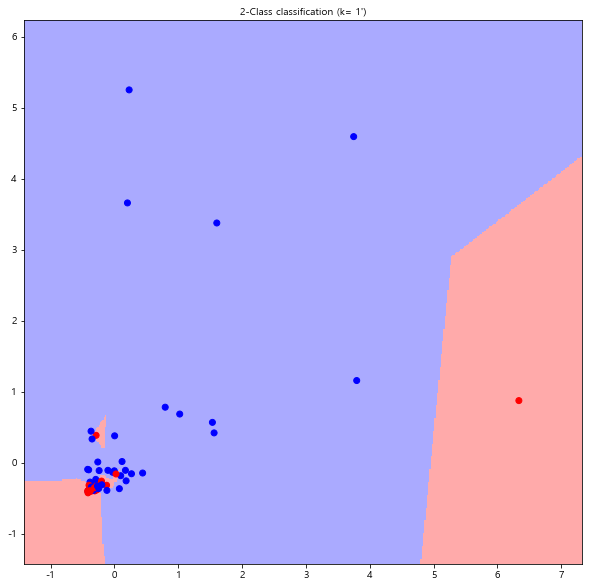

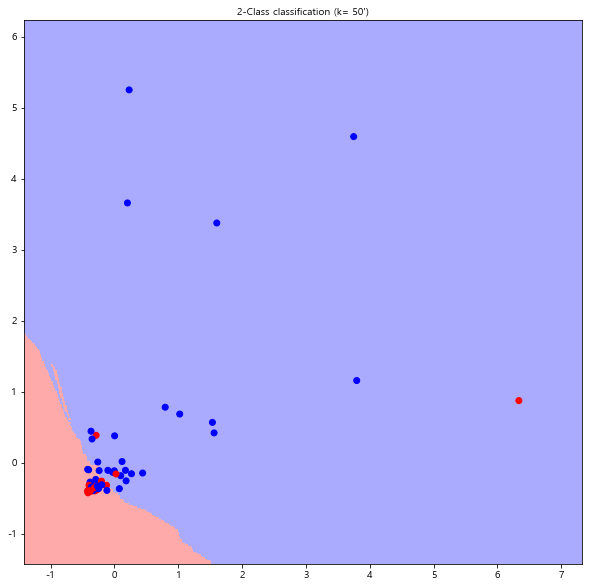

In [50]:
X_vis = X_train[:, :2]
y_vis = y_train.values.ravel()

h = .02

cmap_light = ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000','#00FF00','#0000FF'])

for k in [1,20]:
    # Neighbors Classifier의 인스턴스를 만들고 데이터를 fitting해준다
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_vis,y_vis)

    # Decision boundary를 만들어냄
    x_min, x_max = X_vis[:, 0].min()-1, X_vis[:, 0].max()+1
    y_min, y_max = X_vis[:, 1].min()-1, X_vis[:, 1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max , h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # 결과를 color plot에 넣음
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=[10,10])
    plt.pcolormesh(xx,yy,Z,cmap=cmap_light)

    plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"2-Class classification (k= {k}')", fontsize=10)

    plt.show()

# hyperparameter k 결정

In [51]:
k_list = [i for i in range(1,50)]
cv_scores = []

for k in tqdm(k_list):
    clf = KNeighborsClassifier(n_neighbors = k , p=2) # p=1 : 맨하탄 거리, p=2 : 유클리드 거리, p=l_p :민코우스키 거리
    
    scores = cross_val_score(clf, X_train, y_train, cv=10, scoring = 'accuracy')
    cv_scores.append(scores.mean())

100%|██████████████████████████████████████████████████████████████████████████████████| 49/49 [00:01<00:00, 38.69it/s]


In [52]:
cv_scores

[0.6680555555555555,
 0.6986111111111111,
 0.7583333333333334,
 0.711111111111111,
 0.7569444444444444,
 0.7208333333333334,
 0.7430555555555556,
 0.7319444444444445,
 0.7347222222222223,
 0.7111111111111111,
 0.7458333333333333,
 0.7208333333333333,
 0.7319444444444445,
 0.7319444444444444,
 0.6958333333333333,
 0.6847222222222221,
 0.6833333333333333,
 0.6958333333333333,
 0.6958333333333334,
 0.673611111111111,
 0.6847222222222222,
 0.6986111111111111,
 0.7222222222222221,
 0.7222222222222222,
 0.7222222222222221,
 0.7097222222222223,
 0.7333333333333333,
 0.6875,
 0.6986111111111111,
 0.6875,
 0.6875,
 0.6763888888888889,
 0.6986111111111111,
 0.6875,
 0.6875,
 0.6875,
 0.6875,
 0.6875,
 0.6875,
 0.6986111111111111,
 0.6986111111111111,
 0.6986111111111111,
 0.6986111111111111,
 0.6986111111111111,
 0.6986111111111111,
 0.6986111111111111,
 0.6986111111111111,
 0.6875,
 0.6986111111111111]

In [43]:
best_k = [k_list[i] for i in range(len(cv_scores)) if cv_scores[i] == np.max(cv_scores)]
print("Best k value : ", best_k[0])

Best k value :  3


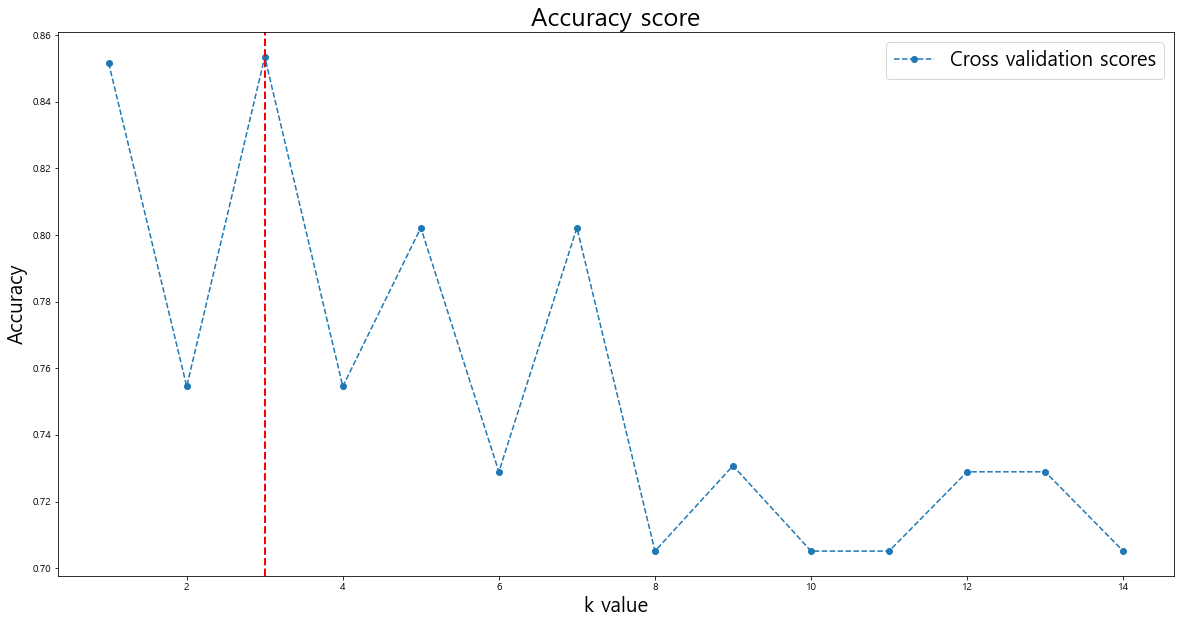

In [44]:
plt.figure(figsize=(20,10))
plt.plot(k_list,cv_scores,marker='o',linestyle='dashed')
plt.legend(["Cross validation scores"], fontsize=20)
plt.xlabel("k value", fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.title("Accuracy score", fontsize=25)
plt.axvline(best_k[0], color='r', linestyle='--', linewidth=2)

# Euclidian distance

In [21]:
k_list = [i for i in range(1,50)]
euc = []

for k in tqdm(k_list):
    classifier = KNeighborsClassifier(n_neighbors = k , p=2) # p=1 : 맨하탄 거리, p=2 : 유클리드 거리, p=l_p :민코우스키 거리
    
    scores = cross_val_score(classifier, X_train, y_train, cv=10, scoring = 'accuracy')
    euc.append(scores.mean())

100%|██████████████████████████████████████████████████████████████████████████████████| 49/49 [00:01<00:00, 36.49it/s]


# Manhattan distance

In [22]:
k_list = [i for i in range(1,19)]
man = []

for k in tqdm(k_list):
    classifier = KNeighborsClassifier(n_neighbors = k , p=1) # p=1 : 맨하탄 거리, p=2 : 유클리드 거리, p=l_p :민코우스키 거리
    
    scores = cross_val_score(classifier, X_train, y_train, cv=10, scoring = 'accuracy')
    man.append(scores.mean())

100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 34.80it/s]


# Mahalanobis distance

In [23]:
y_train = y_train.values.ravel()
kf=KFold(n_splits=10)
kf.get_n_splits(X_train)

k_list = [i for i in range(1,19)]
mah = []

for k in tqdm(k_list):
    mah_acc = []
    for train_index,valid_index in kf.split(X_train):
        X_train_f =X_train[train_index]
        y_train_f =y_train[train_index]
        
        X_valid_f =X_train[valid_index]
        y_valid_f =y_train[valid_index]
        
        total = len(y_valid_f)
        correct = 0
        
        nn = NearestNeighbors(algorithm='brute', metric='mahalanobis',
                              metric_params={'V':np.cov(X_train_f,rowvar=False)}, n_neighbors=k)
        nn_model = nn.fit(X_train_f,y_train_f)
        
        for v in range(len(X_valid_f)):
            distance, indices = nn_model.kneighbors(X_valid_f[v].reshape(1,-1))
            
            class_list = {'0':0, '1':0}
            for i in range(len(indices[0])):
                if y_train_f[indices[0][i]] == 0:
                    class_list['0'] += 1
                else:
                    class_list['1'] += 1
                    
            max_key = np.int(max(class_list,key=class_list.get))
            if max_key == y_valid_f[v]:
                correct += 1
            
            mah_acc.append(correct/total)
        
        mah.append(np.mean(mah_acc))

100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 33.82it/s]


# Correlation distance - pearson correlation

In [24]:
kf=KFold(n_splits=10)
kf.get_n_splits(X_train)

k_list = [i for i in range(1,19)]
pear = []

for k in tqdm(k_list):
    pear_acc = []
    for train_index,valid_index in kf.split(X_train):
        X_train_f =X_train[train_index]
        y_train_f =y_train[train_index]
        
        X_valid_f =X_train[valid_index]
        y_valid_f =y_train[valid_index]
        
        total = len(y_valid_f)
        correct = 0
        
        nn = NearestNeighbors(metric='correlation', n_neighbors=k)
        nn_model = nn.fit(X_train_f,y_train_f)
        
        for v in range(len(X_valid_f)):
            distance, indices = nn_model.kneighbors(X_valid_f[v].reshape(1,-1))
            
            class_list = {'0':0, '1':0}
            for i in range(len(indices[0])):
                if y_train_f[indices[0][i]] == 0:
                    class_list['0'] += 1
                else:
                    class_list['1'] += 1
                    
            max_key = np.int(max(class_list,key=class_list.get))
            if max_key == y_valid_f[v]:
                correct += 1
            
            pear_acc.append(correct/total)
        
        pear.append(np.mean(pear_acc))

100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 44.43it/s]


# Correlation distance - Spearman rank correlation

In [25]:
def spearmancorr(x,y):
    rho, pval = spearmanr(x,y,axis=0)
    return 1-rho

kf=KFold(n_splits=10)
kf.get_n_splits(X_train)

k_list = [i for i in range(1,19)]
spear = []

for k in tqdm(k_list):
    spear_acc = []
    for train_index,valid_index in kf.split(X_train):
        X_train_f =X_train[train_index]
        y_train_f =y_train[train_index]
        
        X_valid_f =X_train[valid_index]
        y_valid_f =y_train[valid_index]
        
        total = len(y_valid_f)
        correct = 0
        
        nn = NearestNeighbors(metric=spearmancorr, n_neighbors=k, algorithm='ball_tree')
        nn_model = nn.fit(X_train_f,y_train_f)
        
        for v in range(len(X_valid_f)):
            distance, indices = nn_model.kneighbors(X_valid_f[v].reshape(1,-1))
            
            class_list = {'0':0, '1':0}
            for i in range(len(indices[0])):
                if y_train_f[indices[0][i]] == 0:
                    class_list['0'] += 1
                else:
                    class_list['1'] += 1
                    
            max_key = np.int(max(class_list,key=class_list.get))
            if max_key == y_valid_f[v]:
                correct += 1
            
            spear_acc.append(correct/total)
        
        spear.append(np.mean(spear_acc))

100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:46<00:00,  2.60s/it]


ValueError: x and y must have same first dimension, but have shapes (49,) and (18,)

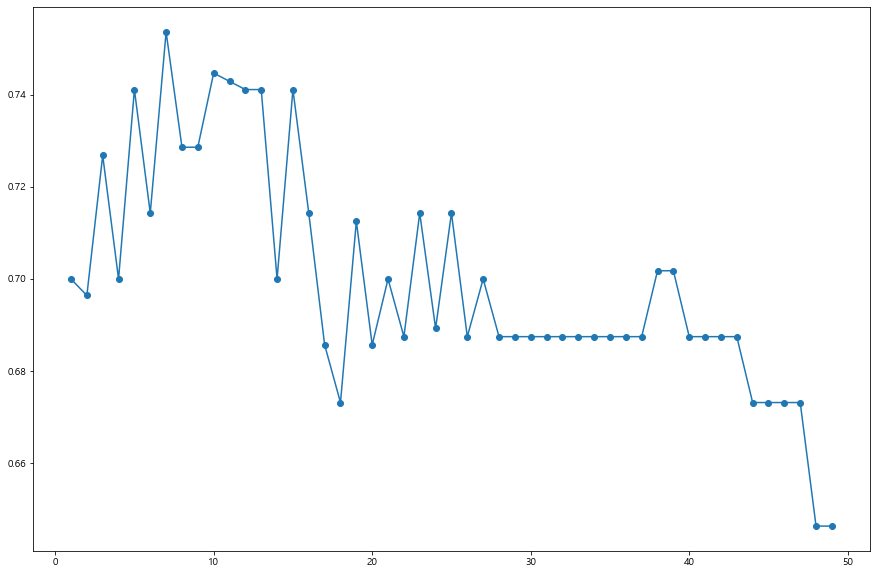

In [37]:
plt.figure(figsize=(15,10))
plt.plot(k_list,euc,marker='o')
plt.plot(k_list,man,marker='p')
plt.plot(k_list,pear,marker='d')
plt.plot(k_list,spear,marker='v')
plt.axvline(7,color='r',linestyle='--',linewidth=2)
plt.xlabel("k value")
plt.ylabel("Cross validation scores")
plt.title("Comparison by distance measures")
plt.legend(["Euclidian","Manhattan","Mahalanobis","Pearson Corr","Spearman Rank Corr"])
plt.show()

In [55]:
classifier = KNeighborsClassifier(n_neighbors=3,p=2)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

acc = accuracy_score(y_true = y_test, y_pred=y_pred)
recall = recall_score(y_true=y_test, y_pred=y_pred)
precision = precision_score(y_true=y_test, y_pred=y_pred)

print(f"정확도{acc:0.4f}", f"민감도:{recall:0.4f}", f"정밀도:{precision:0.4f}", sep=" | ")

정확도0.8108 | 민감도:0.7500 | 정밀도:0.8824


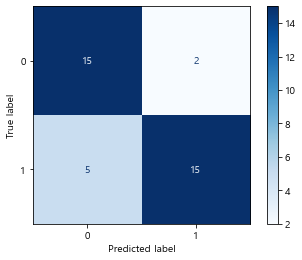

In [56]:
plot_confusion_matrix(classifier,X_test,y_test, cmap=plt.cm.Blues)
plt.show()

### Weighted kNN

In [57]:
classifier = KNeighborsClassifier(n_neighbors=3,p=2,weights='distance')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

acc = accuracy_score(y_true = y_test, y_pred=y_pred)
recall = recall_score(y_true=y_test, y_pred=y_pred)
precision = precision_score(y_true=y_test, y_pred=y_pred)

print(f"정확도{acc:0.4f}", f"민감도:{recall:0.4f}", f"정밀도:{precision:0.4f}", sep=" | ")

정확도0.7568 | 민감도:0.7000 | 정밀도:0.8235
